## Titanic - Machine Leaning from disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this project, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

For this project data has been split in to two set, test.csv and train.csv.

The training set should be used to build your machine learning models. 

The test set should be used to see how well your model performs on unseen data. 

In [1]:
#import general packages

import pandas as pd
import numpy as np

# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

#import modeling packges
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,\
confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import pickle

In [2]:
# load dataset

df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Values are missing in 'Age', 'Cabin' and 'Embarked' columns. Only 204 non-null rows are present in Cabin column.

In [4]:
#Descriptive statics of dataframe

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
#check for duplicate value

df.duplicated().sum()

0

zero duplicate values found in data set

Drop 'Cabin' column as this contain 204 non null values out of 891.

In [6]:
# drop 'Cabin' column
df.drop(columns='Cabin', inplace= True)

### EDA

In [7]:
# survived count
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Only 342 people survived out of 891.

In [8]:
# percentage of Survived

df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Approximately 62% of people didn't survived and only 38% survived the accident

In [9]:
#check count 'Pclass' column

df['Pclass'].value_counts().sort_index().reset_index()

,Pclass,count
0,1,216
1,2,184
2,3,491


491 passengers opted to travel by Pclass 3 outof 891. This is approximately 55% of total passengers.

In [10]:
#check survived people in each 'Pclass'
surv_class = df.groupby(['Pclass'])['Survived'].sum().reset_index()

surv_class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


Eventhough more passengers are travel through Pclass 3, the passenger survived is very less.

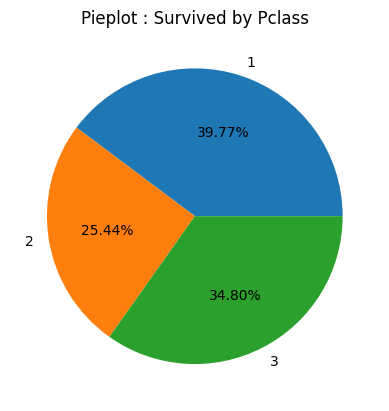

In [11]:
#create pieplot for people survived by Pclass

plt.pie(data= surv_class,x= 'Survived',labels=surv_class['Pclass'],autopct='%1.2f%%')
plt.title('Pieplot : Survived by Pclass')
plt.show()

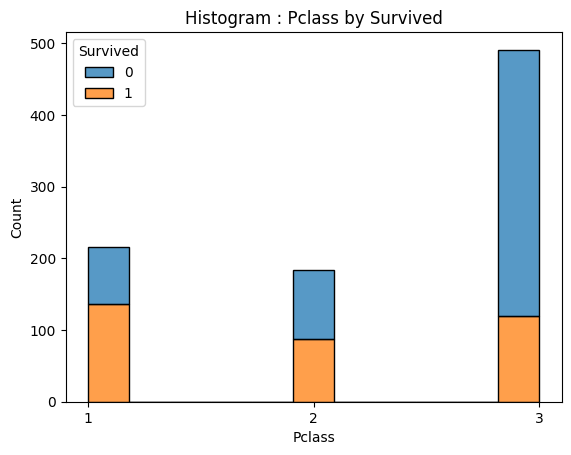

In [12]:
#create a histgram to visualize proportion people survived from each 'Pclass'

sns.histplot(data = df, x = 'Pclass', hue='Survived',multiple='stack')
plt.xticks([1,2,3])
plt.title('Histogram : Pclass by Survived')
plt.show()

People traveled in Pclass '1' and '2' are more likely to survive than people traveled in Pclass '3'

In [13]:
# count men and women in the ship

df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
# Check how many men and women are in survived.
df.groupby(['Survived'])['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [15]:
# find survival rate for both men and women
print(f'Survival rate for men :',round((109/577)*100,2))
print(f'Survival rate for women :',round((233/314)*100,2))

Survival rate for men : 18.89
Survival rate for women : 74.2


Survival rate of women is higher 3 times higher than survival rate of men.

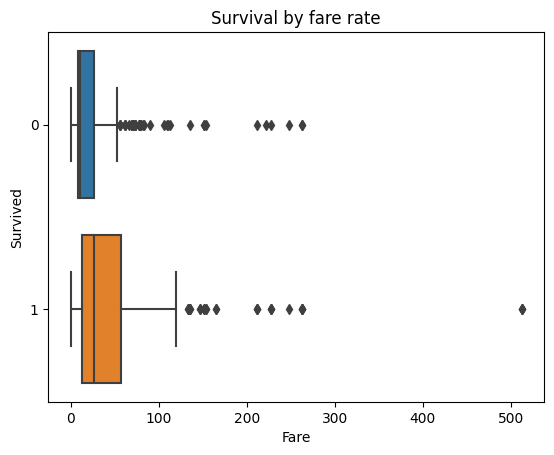

In [16]:
#check fare rate and survival 

sns.boxplot(data = df, x = 'Fare', y='Survived',orient= 'h')
plt.title('Survival by fare rate')
plt.show()

Passenger who paid more are more chance to survive.

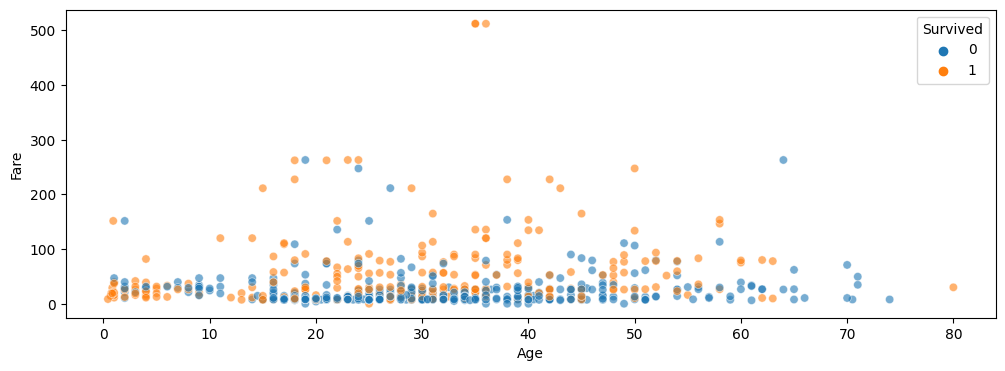

In [17]:
# check relation between age and fare
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x= 'Age', y = 'Fare', hue='Survived', alpha = 0.6)
plt.show()

Higher paid passenger and more chance to survive than lesser paid passenger. Age below 10 is also higher chance of survival.

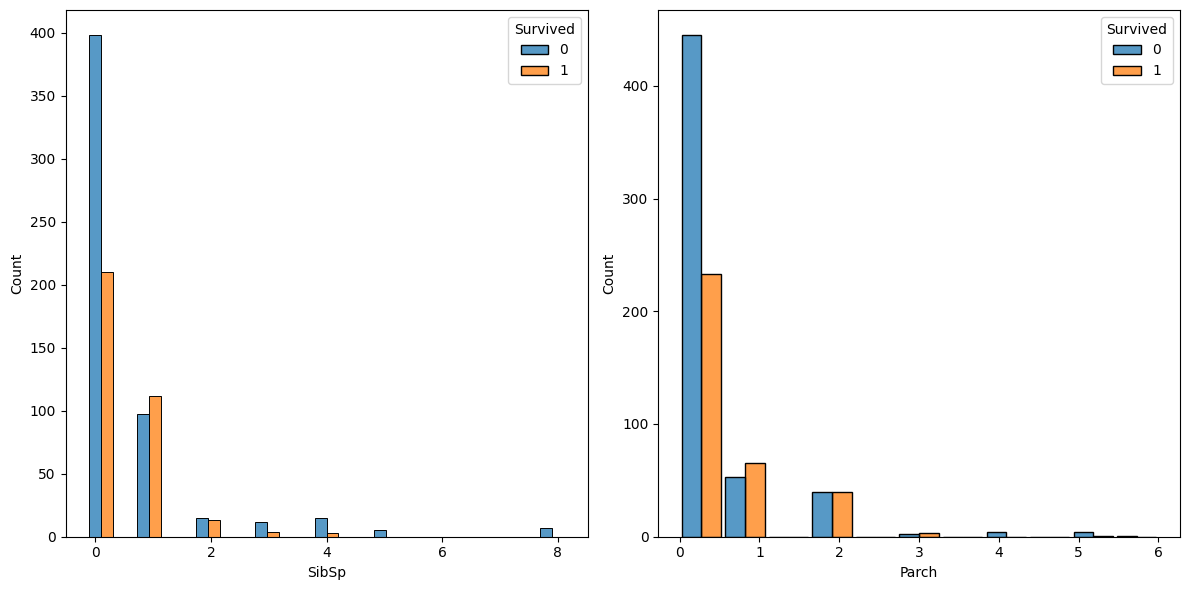

In [18]:
#scatterplot of Survived by SibSp and Parch 

fig, axes = plt.subplots(1,2,figsize = (12,6))
sns.histplot(data = df, x = 'SibSp', hue = 'Survived', ax= axes[0], multiple= 'dodge',shrink = 2)
sns.histplot(data = df, x = 'Parch', hue = 'Survived', ax= axes[1], multiple= 'dodge', shrink = 0.9)
fig.tight_layout()
plt.show()

Make a new feature to indentify the relation between someone traveled alone or someone traveled with a company has more chance to survive.

In [19]:
#Creare a column 'Isalone' 1 is traveled alone 0 if accompanied someone
df['Isalone'] = df['SibSp'] + df['Parch']
df['Isalone'] = (df['Isalone'] <1).astype(np.int8)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


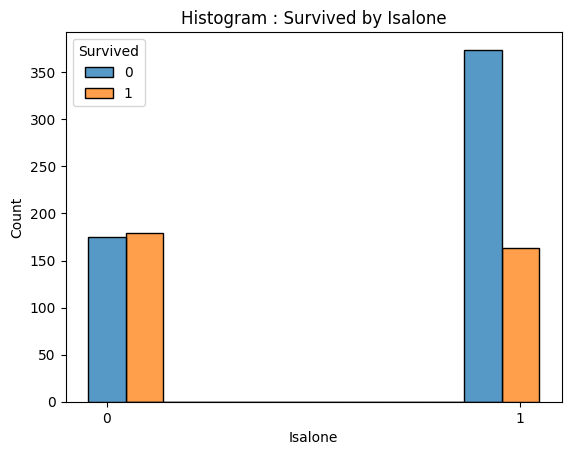

In [20]:
sns.histplot(data = df, x = 'Isalone', hue = 'Survived', multiple= 'dodge',shrink = 2)
plt.xticks([0,1])
plt.title('Histogram : Survived by Isalone')
plt.show()

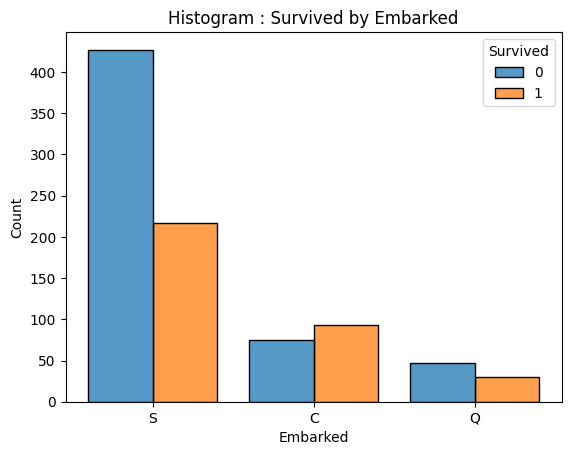

In [21]:
# check embarked related to survived

sns.histplot(data = df, x='Embarked', hue = 'Survived',multiple='dodge',shrink= 0.8)
plt.title('Histogram : Survived by Embarked')
plt.show()

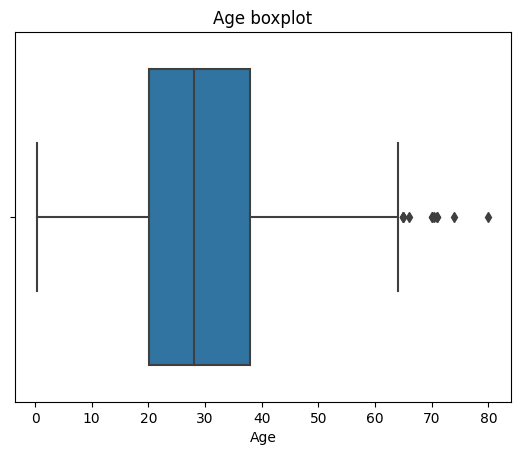

In [22]:
#create a boxplot for Age

sns.boxplot(data = df, x = 'Age')
plt.title('Age boxplot')
plt.show()

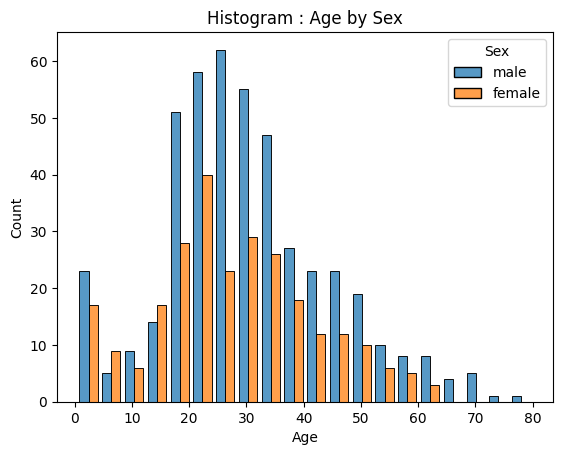

In [23]:
# check or the relation between 'Sex' and 'age_group'

sns.histplot(data = df, x = 'Age', hue= 'Sex', multiple = 'dodge',shrink = 0.8)
plt.title('Histogram : Age by Sex')
plt.show()

Most of the peoples are between the age of 15 to 35. And male representation is higher than female representation.

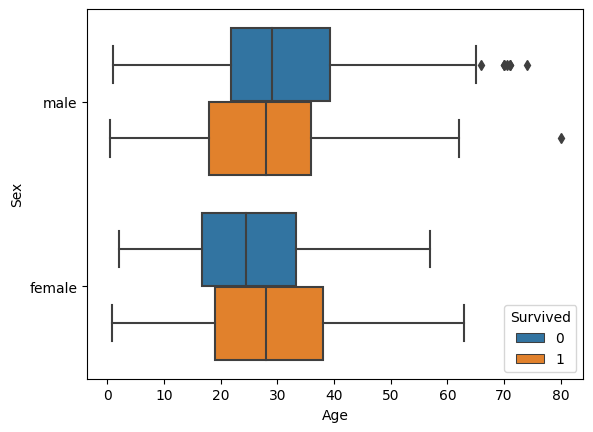

In [24]:
# check which age group is more likely to survive

sns.boxplot(data = df, x ='Age', y = 'Sex', hue='Survived')
plt.show()

Age is a important factor in the dataset. Misssing values in 'Age' will be replaced with mean value of age 

In [25]:
#calculate mean value of Age
mean_age = round(df[df['Age'].notnull()]['Age'].mean(), 2)

mean_age

29.7

In [26]:
#Replace NUll values with the mean age value
df['Age'].fillna(mean_age,inplace= True)

In [27]:
#drop 'Name', 'SibSp','Parch', 'Ticket', 'Fare'

df.drop(columns=['PassengerId','Name', 'SibSp','Parch', 'Ticket'], inplace= True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Isalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [29]:
df_enc = pd.get_dummies(df,drop_first = True)
df_enc.head()

,Survived,Pclass,Age,Fare,Isalone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,True,False,True
1,1,1,38.0,71.2833,0,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,0,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


<Axes: >

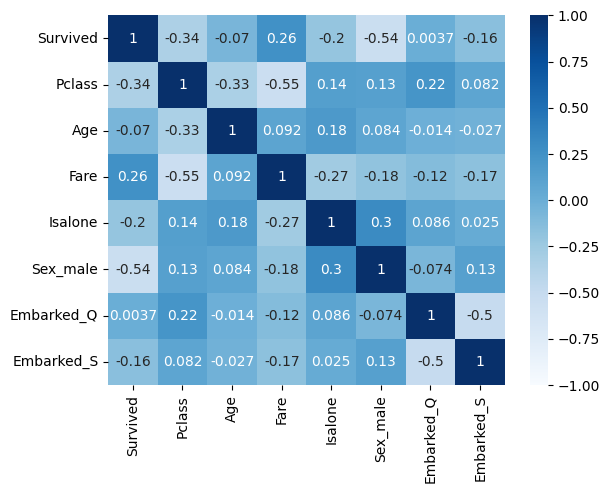

In [30]:
corr = df_enc.corr()

sns.heatmap(corr,vmin=-1,vmax = 1,cmap='Blues',annot= True)

In [31]:
#split data for test and train 

y = df_enc['Survived']
X = df_enc.drop(columns='Survived')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 0, stratify =  y)

#### Modeling
##### DecisionTreeIdentifier

In [32]:
#instantiate tree
tr = DecisionTreeClassifier(random_state=0)

In [33]:
cv_params = {'max_depth': [5,10,15],
             'max_features' : [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
tr = GridSearchCV(tr, cv_params, scoring=scoring, cv=5, refit='accuracy')

In [34]:
%%time
tr.fit(X_train, y_train)

CPU times: user 4.89 s, sys: 12 ms, total: 4.91 s
Wall time: 4.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [0.7, 1],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

In [35]:
tr.best_score_

0.813158672313602

In [36]:

tr.best_params_

{'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [37]:
tr_model = tr.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=1, random_state=0)

In [38]:
path = '/titanic/models/'

In [39]:
#function to write model
def write_pickle(model_name: str, path, model_obj):
    with open (path+model_name+'.pickle', 'wb') as to_write:
        pickle.dump(model_obj,to_write)
#function to read model
def read_pickle(model_name,path):
    with open (path+model_name+'.pickle','rb') as to_read:
        model = pickle.load(to_read)
    return model

In [ ]:
#write tree model 

write_pickle('tree',path, tr_model)

tree_model = read_pickle('tree', path)

In [ ]:
tree_model.scorer_

### RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=0)

In [41]:
cv_params = {'max_depth': [5,10,20],
             'max_features' : [0.7, 1],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [75,100,200]
             }

# 3. Define a set of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [42]:
%%time

rf1.fit(X_train,y_train)

CPU times: user 3min 28s, sys: 269 ms, total: 3min 29s
Wall time: 3min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20], 'max_features': [0.7, 1],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [43]:
#write_pickle('treemodel',path,tree)


In [44]:

#tr1 = read_pickle('treemodel',path)

In [45]:
rf1.best_score_

0.7800744448722885

In [46]:
rf1.best_params_

{'max_depth': 10,
 'max_features': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [47]:
pred = rf1.best_estimator_.predict(X_test)

In [48]:
accc = f1_score(y_test,pred)
accc

0.746031746031746

In [49]:
#read test data
test_df = pd.read_csv('/home/modernistauto/workspace/data_science_projects/titanic/titanic/test.csv')
passengerid = test_df['PassengerId']
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
df_enc.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Isalone', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [51]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
# feature engineering
#drop less  important  columns
test_df.drop(columns=['PassengerId', 'Name', 
       'Ticket', 'Cabin'],inplace = True)

In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [54]:

test_df['Isalone'] = test_df['SibSp'] + test_df['Parch']
test_df['Isalone'] = (test_df['Isalone'] <1).astype(np.int8)

test_df.drop(columns=['SibSp', 'Parch'],inplace= True)
test_df_enc = pd.get_dummies(test_df)
test_df_enc.head()
#Pclass	Age	Fare	Isalone	Sex_female	Sex_male	Embarked_C	Embarked_Q	Embarked_S

,Pclass,Age,Fare,Isalone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,False,True,False,True,False
1,3,47.0,7.0000,0,True,False,False,False,True
2,2,62.0,9.6875,1,False,True,False,True,False
3,3,27.0,8.6625,1,False,True,False,False,True
4,3,22.0,12.2875,0,True,False,False,False,True


In [55]:
out_put = rf1.predict(test_df_enc)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Embarked_C
- Sex_female


In [ ]:
out_put

In [ ]:
test_df.shape

In [ ]:
out_put.shape

In [ ]:
"""submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": out_put
    })
submission.to_csv('./submission.csv', index=False)"""